# Sleep Data Analysis

In [114]:
# Case study source: https://github.com/WillKoehrsen/ai-projects/blob/master/bayesian_inference/bayes_rule_applied.ipynb 
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize

figsize(6, 9)

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

import datetime

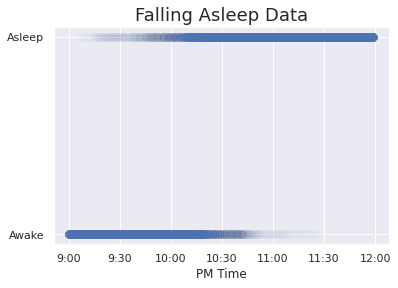

In [116]:

# Data formatted in different notebook
sleep_data = pd.read_csv('sleep_data.csv')

# Labels for plotting
sleep_labels = ['9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00']

# Sleep data
plt.scatter(sleep_data['time_offset'], sleep_data['indicator'], 
            s= 60, alpha=0.01, facecolor = 'b', edgecolors='b')
plt.yticks([0, 1], ['Awake', 'Asleep']); plt.xlabel('PM Time'); 
plt.title('Falling Asleep Data', size = 18)
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);

In [117]:
sleep_data.head

<bound method NDFrame.head of                 Unnamed: 0  indicator  time_offset
0      2017-12-01 21:00:00          0          -60
1      2017-12-01 21:01:00          0          -59
2      2017-12-01 21:02:00          0          -58
3      2017-12-01 21:03:00          0          -57
4      2017-12-01 21:04:00          0          -56
...                    ...        ...          ...
11335  2018-02-01 23:55:00          1          115
11336  2018-02-01 23:56:00          1          116
11337  2018-02-01 23:57:00          1          117
11338  2018-02-01 23:58:00          1          118
11339  2018-02-01 23:59:00          1          119

[11340 rows x 3 columns]>

In [118]:
# Sort the values by time offset
sleep_data.sort_values('time_offset', inplace=True)

# Time is the time offset
time = np.array(sleep_data.loc[:, 'time_offset'])

# Observations are the indicator
sleep_obs = np.array(sleep_data.loc[:, 'indicator'])

In [119]:
sleep_data.tail()

,Unnamed: 0,indicator,time_offset
8999,2018-01-19 23:59:00,1,119
2159,2017-12-12 23:59:00,1,119
9179,2018-01-20 23:59:00,1,119
5579,2017-12-31 23:59:00,1,119
11339,2018-02-01 23:59:00,1,119


In [120]:
time.shape

(11340,)

In [121]:
time 

array([-60, -60, -60, ..., 119, 119, 119])

In [122]:
sleep_obs

array([0, 0, 0, ..., 1, 1, 1])

In [123]:
sleep_obs.shape  #it is same 

(11340,)

In [124]:
sleep_obs[3260:3275]

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [125]:
sleep_data.loc[sleep_data['time_offset'] == 0]

,Unnamed: 0,indicator,time_offset
6900,2018-01-08 22:00:00,0,0
1680,2017-12-10 22:00:00,0,0
4740,2017-12-27 22:00:00,1,0
3300,2017-12-19 22:00:00,1,0
2940,2017-12-17 22:00:00,0,0
...,...,...,...
11040,2018-01-31 22:00:00,0,0
780,2017-12-05 22:00:00,1,0
1320,2017-12-08 22:00:00,1,0
9960,2018-01-25 22:00:00,1,0


# Calculating Probability at a Particular Time on frequencey based

In [126]:
time_offset = 14 # time is  22:14

In [127]:
## when the banda 
awake_vals = sleep_data.loc[(sleep_data['time_offset'] == time_offset) # select these vals from sleep_data.csv file
                            & (sleep_data['indicator'] == 0)] 

In [128]:
sleep_vals = sleep_data.loc[(sleep_data['time_offset'] == time_offset) 
                            & (sleep_data['indicator'] == 1)]

In [129]:
print(len(sleep_vals), len(awake_vals))

29 34


In [130]:
p_sleep_at_offset = len(sleep_vals) / (len(sleep_vals) + len(awake_vals))
print(p_sleep_at_offset)

0.4603174603174603


# Calculating the Prior

In [131]:
# Logistic Parameters from Markov Chain Monte Carlo Notebook - Don't have to understand how got this, for now
alpha = 0.977400
beta = -0.067270

def calculate_prior(time, alpha, beta):
    p = 1.0 / (1.0 + np.exp(np.dot(beta, time) + alpha))
    return p

# Done using some other method here but in essence, it's the same as above. This other method works even if you have little data. 
time_est = np.linspace(time.min()- 5, time.max() + 5, 1000)[:, None]

# Probability at each time using mean values of alpha and beta
sleep_est = calculate_prior(time_est, alpha, beta)

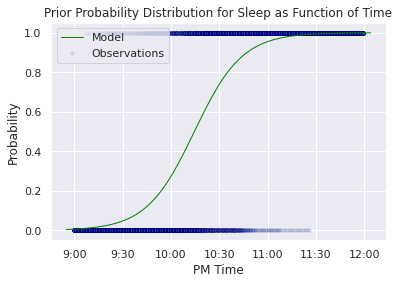

In [142]:
plt.plot(time_est, sleep_est, color = 'green', 
         lw=1, label="Model")
plt.scatter(time, sleep_obs, edgecolor = 'navy',
            s=10, alpha=0.1, label='Observations')
plt.title('Prior Probability Distribution for Sleep as Function of Time');

plt.ylabel('Probability')
plt.xlabel('PM Time');
plt.legend(loc=2)
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);


In [133]:
print('The probability of sleep increases to above 50% at 10:{} PM.\n'.format(
          int(time_est[np.where(sleep_est > 0.5)[0][0]][0])
        )
     )

print('9:30  PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(-30, alpha, beta)))
print('10:00 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(0, alpha, beta)))
print('10:30 PM probability of being asleep: {:.2f}%.'.
      format(100 * calculate_prior(15, alpha, beta))) 

The probability of sleep increases to above 50% at 10:14 PM.

9:30  PM probability of being asleep: 4.76%.
10:00 PM probability of being asleep: 27.34%.
10:30 PM probability of being asleep: 50.79%.


# Bayes Update on Distributions

In [134]:
# likelihoods

# P(light | sleep)
light_sleep = 0.01

# P(-light | sleep)
nolight_sleep = 0.99

# P(light | -sleep)
light_nosleep = 0.8

# P(-light | -sleep)
nolight_nosleep = 0.2

In [135]:
 
def update_probability(time_offset, light):
    # Calculate the prior for the time
    prior_probability = calculate_prior(time_offset, alpha, beta)
    
    # Account for evidence
    if light == 0:
        likelihood = nolight_sleep
        non_likelihood = nolight_nosleep
    elif light == 1:
        likelihood = light_sleep
        non_likelihood = light_nosleep
        
    # rewrite in terms of Bayes rule
    numerator = likelihood * prior_probability
    denominator = (likelihood * prior_probability) + (non_likelihood * (1 - prior_probability))
    
    conditional_probability = numerator / denominator
    
    
    if type(time_offset) == int:
        time = datetime.datetime(2017, 1, 1, 10, 0, 0)
        new_time = str((time + datetime. timedelta(minutes = time_offset)).time())
                       
        print('Time: {} PM \nLight is {}.'.format(new_time, "ON" if light == 1 else "OFF"))
    
        print('The prior probability of sleep:    {:.2f}%'.format(100 * prior_probability))
        print('The updated probability of sleep:  {:.2f}%'.format(100 * conditional_probability))
    
    return conditional_probability

In [136]:
result = update_probability(time_offset = 30, light = 1)

Time: 10:30:00 PM 
Light is ON.
The prior probability of sleep:    73.90%
The updated probability of sleep:  3.42%


In [137]:
result = update_probability(time_offset = 30, light = 0)

Time: 10:30:00 PM 
Light is OFF.
The prior probability of sleep:    73.90%
The updated probability of sleep:  93.34%


In [138]:
result = update_probability(time_offset = -30, light = 1)

Time: 09:30:00 PM 
Light is ON.
The prior probability of sleep:    4.76%
The updated probability of sleep:  0.06%


In [139]:
result = update_probability(time_offset = -30, light = 0)

Time: 09:30:00 PM 
Light is OFF.
The prior probability of sleep:    4.76%
The updated probability of sleep:  19.84%


# Updating All Priors Independenantly

In [140]:
light_on_prob = update_probability(time_est, light = 1)
light_off_prob = update_probability(time_est, light =  0)

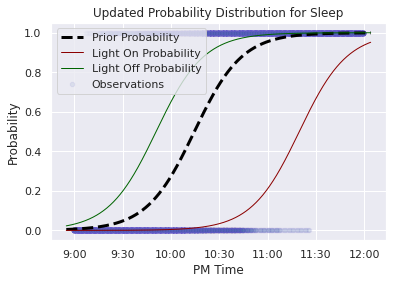

In [141]:
plt.plot(time_est, sleep_est, color = 'black', 
         lw=3, linestyle = '--', label="Prior Probability")
plt.plot(time_est, light_on_prob, color = 'darkred',
          lw = 1, label = 'Light On Probability')
plt.plot(time_est, light_off_prob, color = 'darkgreen',
           lw = 1, label = 'Light Off Probability')
plt.scatter(time, sleep_obs, edgecolor = 'slateblue',
            s=20, alpha=0.1, label='Observations')
plt.title('Updated Probability Distribution for Sleep');
plt.legend(loc=2)
plt.ylabel('Probability')
plt.xlabel('PM Time');
plt.xticks([-60, -30, 0, 30, 60, 90, 120], sleep_labels);